In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

Игнорирование предупреждений

In [ ]:
warnings.filterwarnings('ignore')

Чтение файла

In [ ]:
df = pd.read_json('train.json')

In [ ]:
df.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


In [ ]:
df.shape

(39774, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


In [ ]:
df.dtypes

,0
id,int64
cuisine,object
ingredients,object


In [ ]:
df[df['cuisine']=='russian']


,id,cuisine,ingredients
369,38346,russian,"[water, grits, mozzarella cheese, salt]"
430,35962,russian,"[water, dill, sugar, buttermilk, onions, red b..."
669,49388,russian,"[black pepper, salt, white sandwich bread, who..."
774,15753,russian,"[white pepper, salt, eggs, unsalted butter, br..."
778,39356,russian,"[white cabbage, salt, extra-virgin olive oil, ..."
...,...,...,...
39296,4486,russian,"[granulated sugar, all-purpose flour, brandy, ..."
39368,3878,russian,"[bread crumb fresh, vegetable oil, sour cream,..."
39493,31866,russian,"[kefir, vegetable oil, eggs, baking soda, salt..."
39653,18039,russian,"[hazelnuts, baking soda, salt, confectioners s..."


Подсчет уникальных ингридиентов русской кухни

In [ ]:
arr = []
for col in range(df.shape[0]):
  if df['cuisine'][col] == 'russian':
    arr += df['ingredients'][col]
len(set(arr))

872

Построение графика

<Axes: ylabel='ingredient'>

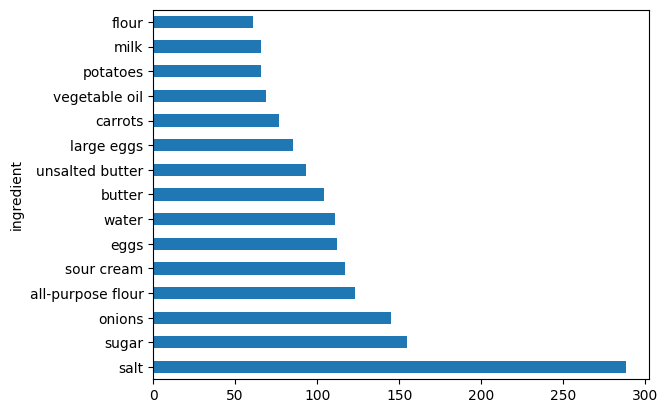

In [ ]:
temp = pd.DataFrame({'ingredient': arr})
temp['ingredient'].value_counts()[:15].plot(kind='barh')

<Axes: xlabel='cuisine'>

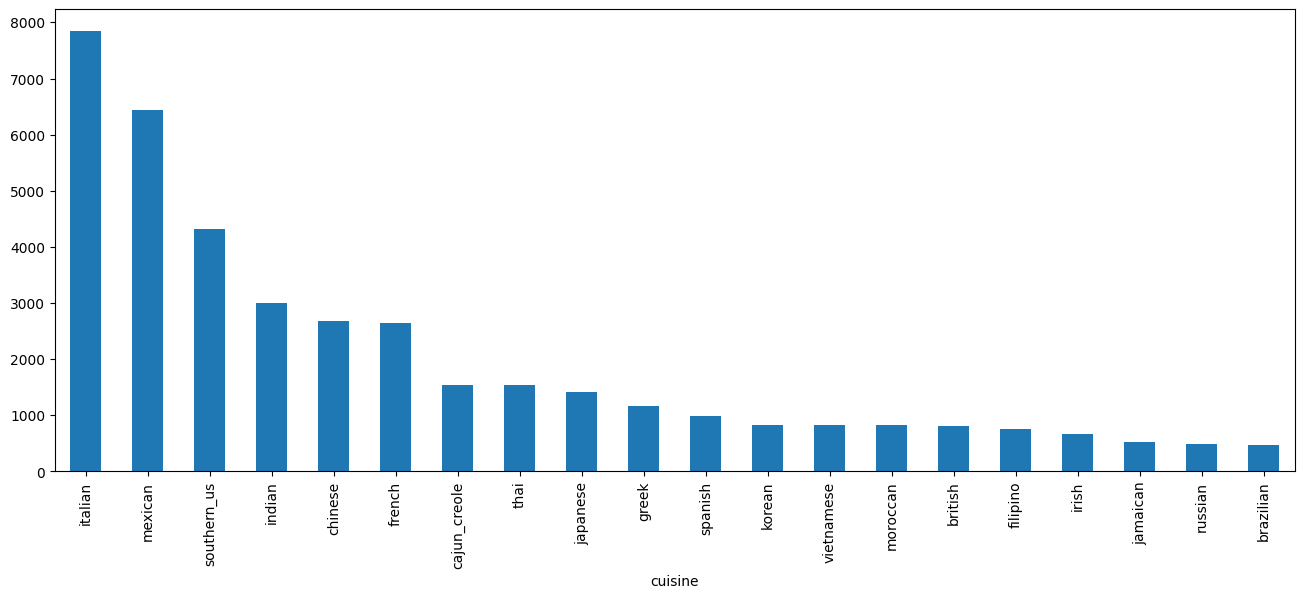

In [ ]:
df['cuisine'].value_counts().plot.bar(figsize=(16,6))

In [ ]:
raw_ingredients = [ing for ingredients in df['ingredients'] for ing in ingredients]
raw_ingredients

['romaine lettuce',
 'black olives',
 'grape tomatoes',
 'garlic',
 'pepper',
 'purple onion',
 'seasoning',
 'garbanzo beans',
 'feta cheese crumbles',
 'plain flour',
 'ground pepper',
 'salt',
 'tomatoes',
 'ground black pepper',
 'thyme',
 'eggs',
 'green tomatoes',
 'yellow corn meal',
 'milk',
 'vegetable oil',
 'eggs',
 'pepper',
 'salt',
 'mayonaise',
 'cooking oil',
 'green chilies',
 'grilled chicken breasts',
 'garlic powder',
 'yellow onion',
 'soy sauce',
 'butter',
 'chicken livers',
 'water',
 'vegetable oil',
 'wheat',
 'salt',
 'black pepper',
 'shallots',
 'cornflour',
 'cayenne pepper',
 'onions',
 'garlic paste',
 'milk',
 'butter',
 'salt',
 'lemon juice',
 'water',
 'chili powder',
 'passata',
 'oil',
 'ground cumin',
 'boneless chicken skinless thigh',
 'garam masala',
 'double cream',
 'natural yogurt',
 'bay leaf',
 'plain flour',
 'sugar',
 'butter',
 'eggs',
 'fresh ginger root',
 'salt',
 'ground cinnamon',
 'milk',
 'vanilla extract',
 'ground ginger',
 'po

In [ ]:
df['ingredients'].str.len().max()

65

In [ ]:
df['ingredients'].str.len().min()

1

In [ ]:
df['ingredients'].str.len().mean()

10.76771257605471

Блюда состоязие из 1 ингр-та

In [ ]:
df[df['ingredients'].str.len()==1]

,id,cuisine,ingredients
940,4734,japanese,[sushi rice]
2088,7833,vietnamese,[dried rice noodles]
6787,36818,indian,[plain low-fat yogurt]
7011,19772,indian,[unsalted butter]
8181,16116,japanese,[udon]
8852,29738,thai,[sticky rice]
8990,41124,indian,[butter]
10506,32631,mexican,[corn tortillas]
13178,29570,thai,[grained]
17804,29849,southern_us,[lemonade concentrate]


Функция распределения по кол-ву ингр-в

<Axes: xlabel='num_ing', ylabel='count'>

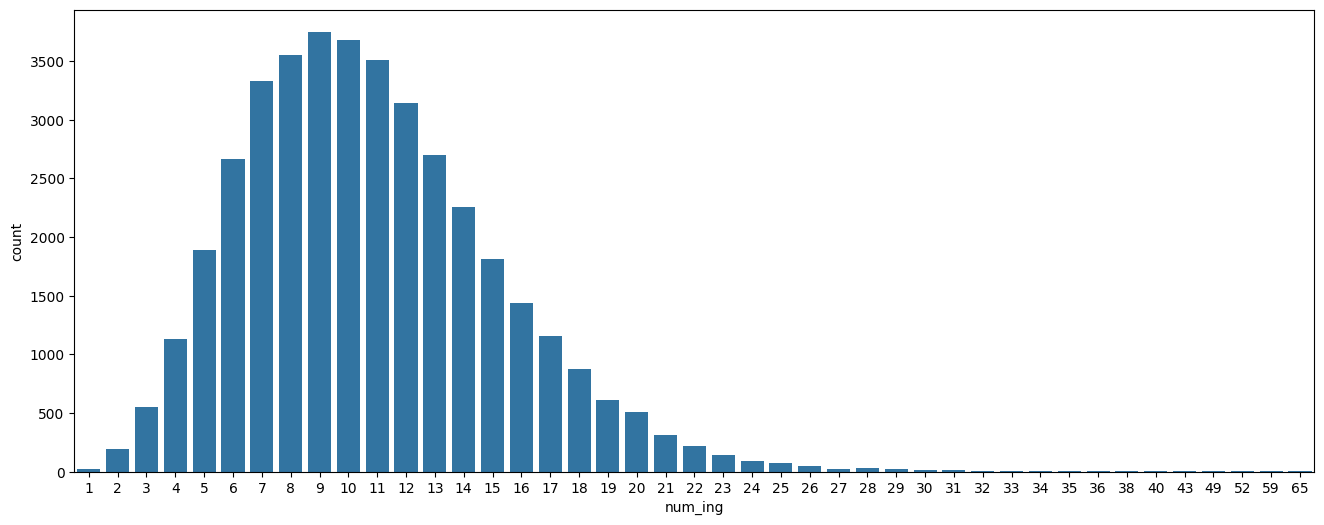

In [ ]:
df['num_ing'] = df['ingredients'].str.len()
plt.figure(figsize=(16, 6))
sns.countplot(x='num_ing', data=df)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

Разделение инг-ов

In [ ]:
# Создание нового столбца, содержащего строки ингредиентов, объединённые через запятую
df['separated_ingredients'] = df['ingredients'].apply(','.join)

"""
- TfidfVectorizer(binary=True): Это класс из библиотеки sklearn,
который используется для преобразования текстовых данных в числовые векторы.
Параметр binary=True означает, что мы хотим использовать бинарную векторизацию,
т.е. если ингредиент присутствует в рецепте, он будет представлен как 1,
если отсутствует — как 0.
- .fit(df['separated_ingredients'].values): Метод fit обучает векторизатор на данных.
Он создает словарь всех уникальных ингредиентов (слов) и присваивает им индексы.
"""
vect = TfidfVectorizer(binary=True).fit(df['separated_ingredients'].values)

"""
- .transform(...): Этот метод преобразует строки ингредиентов в
векторное представление на основе обученного векторизатора.
Результатом будет разреженная матрица, где строки соответствуют
рецептам, а столбцы — уникальным ингредиентам.
"""
X_train_vectorized = vect.transform(df['separated_ingredients'].values)

#Иногда алгоритмы машинного обучения требуют, чтобы входные данные были в формате float. Этот шаг гарантирует, что данные имеют нужный тип.
X_train_vectorized = X_train_vectorized.astype('float')


In [ ]:
#vect = TfidfVectorizer(binary=True).fit(df['separated_ingredients'].values) на этом этапе создает словарь всех
#уникальных ингредиентов (слов) и присваивает им индексы.




In [ ]:
df['separated_ingredients']

,separated_ingredients
0,"romaine lettuce,black olives,grape tomatoes,ga..."
1,"plain flour,ground pepper,salt,tomatoes,ground..."
2,"eggs,pepper,salt,mayonaise,cooking oil,green c..."
3,"water,vegetable oil,wheat,salt"
4,"black pepper,shallots,cornflour,cayenne pepper..."
...,...
39769,"light brown sugar,granulated sugar,butter,warm..."
39770,"KRAFT Zesty Italian Dressing,purple onion,broc..."
39771,"eggs,citrus fruit,raisins,sourdough starter,fl..."
39772,"boneless chicken skinless thigh,minced garlic,..."


In [ ]:
#df['separated_ingredients']

In [ ]:
#df.head()

Кодировка кухни

In [ ]:
# Преобразование в числовые метки
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_transformed = encoder.fit_transform(df['cuisine'])
y_transformed

array([ 6, 16,  4, ...,  8,  3, 13])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_vectorized, y_transformed, test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf1 = LogisticRegression(C=10, dual=False)
clf1.fit(X_train, y_train)
clf1.score(X_test, y_test)

0.7769211430486885

In [ ]:
x_check = vect.transform(['dough, onion'])
encoder.inverse_transform(clf1.predict(x_check))

array(['mexican'], dtype=object)

In [ ]:
# просмотр ингредиентов set(raw_ingredients)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=600, random_state=42)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

KeyboardInterrupt: 

In [ ]:
# Преобразование нового списка ингредиентов в числовой вектор с использованием обученного TfidfVectorizer
x_check = vect.transform(['onion'])

# Предсказание класса (кухни) для нового числового вектора ингредиентов с помощью обученной модели
predicted_class_numerical = clf.predict(x_check)

# Преобразование числовой метки класса обратно в исходное название кухни с использованием обратного преобразования LabelEncoder
encoder.inverse_transform(predicted_class_numerical)


AttributeError: 'list' object has no attribute 'take'

Просмотр готовых наборов данных

In [ ]:
sns.load_dataset('planets')

In [ ]:
sns.get_dataset_names()

Продолжительность жизни

In [ ]:
df = sns.load_dataset('healthexp')
df.head()

Прогноз страны на основе прод-ти жизни и расходов

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

Преобразование взодных данных для лог. регр-ии

In [ ]:
# Создание нового столбца, содержащего строки ингредиентов, объединённые через запятую
df['separated_ingredients'] = df['ingredients'].apply(','.join)

# Создание экземпляра TfidfVectorizer с бинарной векторизацией и обучение его на строках ингредиентов
vect = TfidfVectorizer(binary=True).fit(df['separated_ingredients'].values)

# Преобразование строк ингредиентов в векторное представление с использованием обученного TfidfVectorizer
X_train_vectorized = vect.transform(df['separated_ingredients'].values)

# Преобразование типа данных матрицы во float, возможно, для совместимости с алгоритмами машинного обучения
X_train_vectorized = X_train_vectorized.astype('float')